In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.array([1,2,3,4])
y = np.array([2,2.8,3.6,4.5])


In [3]:
w = 0
b = 0
alpha = 0.01
num_iteration = 20


In [4]:
sse_value = []

for i in range(num_iteration):
    y_hat = w * x + b
    D_w = 2 * np.sum((y_hat - y)* x) #Delta W
    D_b = 2 * np.sum(y_hat - y) * 1  #Delta b
    
    w -= alpha * D_w # New value of w
    b -= alpha * D_b # New value of b
    
    sse = (np.sum(y_hat - y)**2)
    sse_value.append(sse)
    if (i+1) % 20 == 0:
        print(f"iteration{i+1}, sse:{sse}, optimized_param: bias = {b}, slope is: {w}")

iteration20, sse:0.13720282157124256, optimized_param: bias = 0.5388025938800368, slope is: 1.0378816512559883


In [5]:
y_new_line = w * 5 + b
y_new_line

np.float64(5.728210850159979)

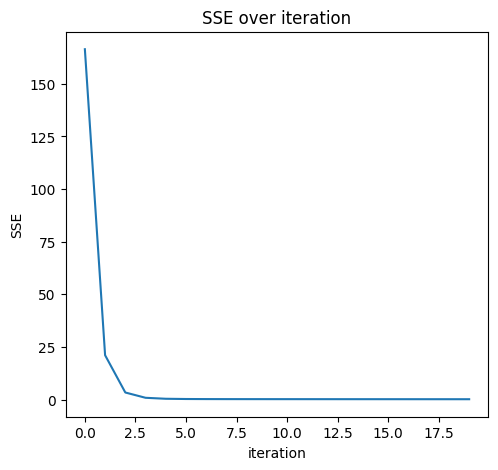

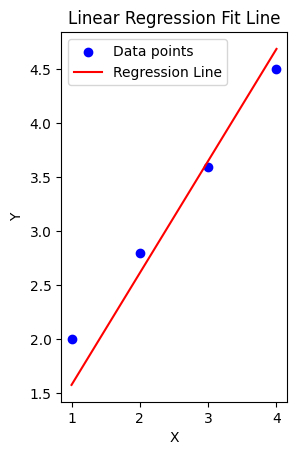

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(num_iteration),sse_value, label = "sse")
plt.xlabel("iteration")
plt.ylabel("SSE")
plt.title("SSE over iteration")
plt.show()
plt.subplot(1,2,2)
plt.scatter(x,y,color="blue",label= "Data points")
plt.plot(x,w*x+b, color="red", label= "Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit Line")
plt.legend()
plt.show()

In [7]:
class LinearRegression:
    
    def __init__(self):
        pass

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error, root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [9]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 300x300 with 0 Axes>

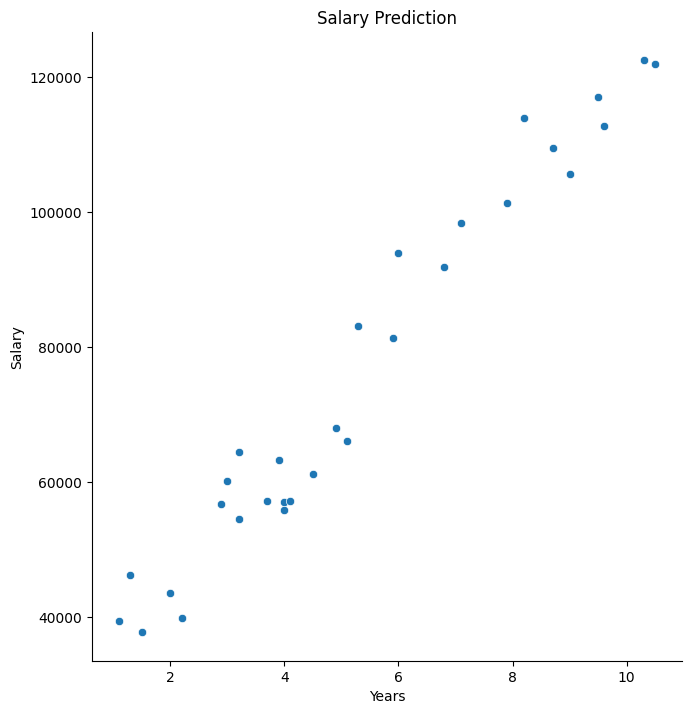

In [10]:
plt.figure(figsize=(3,3))
sns.pairplot(data, x_vars=["YearsExperience"], y_vars=["Salary"],size = 7, kind = "scatter")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=10)


In [13]:
x_train

,YearsExperience
13,4.1
27,9.6
12,4.0
1,1.3
19,6.0
14,4.5
18,5.9
6,3.0
11,4.0
23,8.2


In [14]:
x_test

,YearsExperience
20,6.8
7,3.2
5,2.9
2,1.5
3,2.0
21,7.1


In [15]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
pred_x = reg_model.predict(x_train)
pred_y = reg_model.predict(x_test)

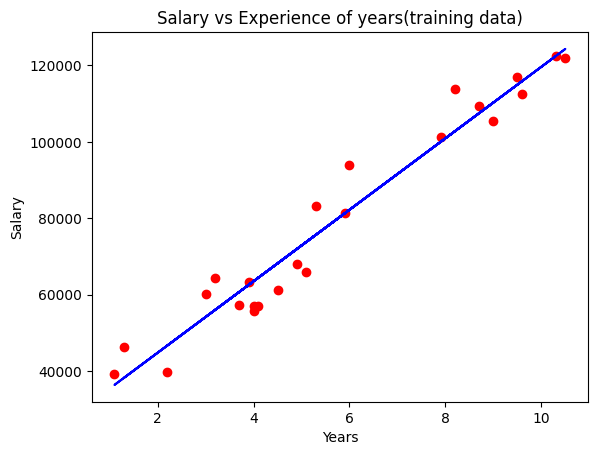

In [16]:
plt.scatter(x_train,y_train, color= "red")
plt.plot(x_train,pred_x,color="blue")
plt.title("Salary vs Experience of years(training data)")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

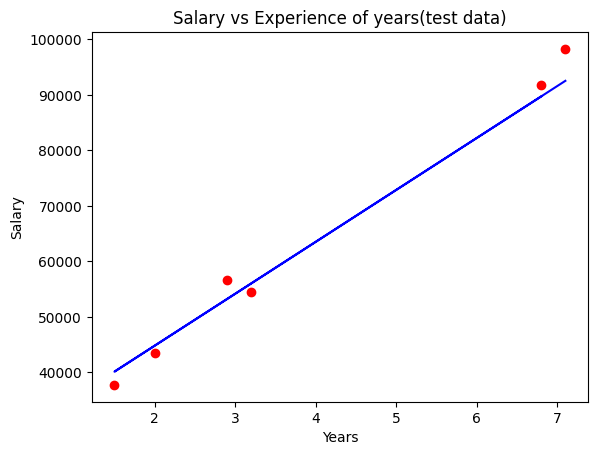

In [17]:
plt.scatter(x_test,y_test, color= "red")
plt.plot(x_test,pred_y,color="blue")
plt.title("Salary vs Experience of years(test data)")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

In [18]:
y_pred = reg_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rsq = root_mean_squared_error(y_test,y_pred)
print(mse)
print("*" * 50)
print(rsq)
print("*" * 50)
print(x_test)
print("*" * 50)
print(y_pred)
print("*" * 50)
print(y_test)
print("*" * 50)
r2 = r2_score(y_test,y_pred)
print(r2)

9785570.138914317
**************************************************
3128.189594464235
**************************************************
    YearsExperience
20              6.8
7               3.2
5               2.9
2               1.5
3               2.0
21              7.1
**************************************************
[89715.76498848 56031.05821174 53223.99931368 40124.39112273
 44802.8226195  92522.82388655]
**************************************************
20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64
**************************************************
0.9816423482070253


In [19]:
reg_model.intercept_ # bias

np.float64(26089.096632416724)

In [20]:
reg_model.coef_ # Slope

array([9356.86299354])

In [21]:
x = float(input("Please Enter your Experience"))
y_hat = 9356 * x + 26089
print(y_hat)

213209.0


In [22]:
dataset = pd.read_csv("datadata.txt")

In [23]:
dataset

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [24]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [25]:
x

,X
0,1
1,2
2,3
3,4


In [26]:
y

0    2
1    4
2    6
3    8
Name:  y , dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x,y)
lin.coef_

array([2.])

In [30]:
from sklearn.linear_model import Ridge, Lasso
l = 10
Ridge = Ridge(alpha=1)
Ridge.fit(x,y)
Ridge.coef_

array([1.66666667])

In [29]:
from sklearn.linear_model import Lasso

# Define your variable
l = 30  # Try changing this value now

# Pass 'l' into the alpha parameter
# Note: I renamed the instance to 'lasso_model' to avoid overwriting the class name
lasso_model = Lasso(alpha=l) 

lasso_model.fit(x, y)
print(lasso_model.coef_)

[0.]
